# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 551


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
         # Create endpoint URL with each city
        response = requests.get(city_url).json()
 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | howard springs
Processing Record 8 of Set 1 | las tablas
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | nova sintra
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | touros
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | am djarass
City not found. Skipping...
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set 1 | college
Processing Record 2

In [93]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          525
Lat           525
Lng           525
Max Temp      525
Humidity      525
Cloudiness    525
Wind Speed    525
Country       525
Date          525
dtype: int64

In [94]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,-1.82,78,22,13.29,GL,1731372152
1,olonkinbyen,70.9221,-8.7187,0.56,96,100,9.83,SJ,1731372153
2,grytviken,-54.2811,-36.5092,-0.35,91,92,5.06,GS,1731372154
3,blackmans bay,-43.0167,147.3167,20.29,52,0,0.89,AU,1731372155
4,adamstown,-25.0660,-130.1015,21.82,64,100,1.00,PN,1731372156


In [95]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [96]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,-1.82,78,22,13.29,GL,1731372152
1,olonkinbyen,70.9221,-8.7187,0.56,96,100,9.83,SJ,1731372153
2,grytviken,-54.2811,-36.5092,-0.35,91,92,5.06,GS,1731372154
3,blackmans bay,-43.0167,147.3167,20.29,52,0,0.89,AU,1731372155
4,adamstown,-25.0660,-130.1015,21.82,64,100,1.00,PN,1731372156


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

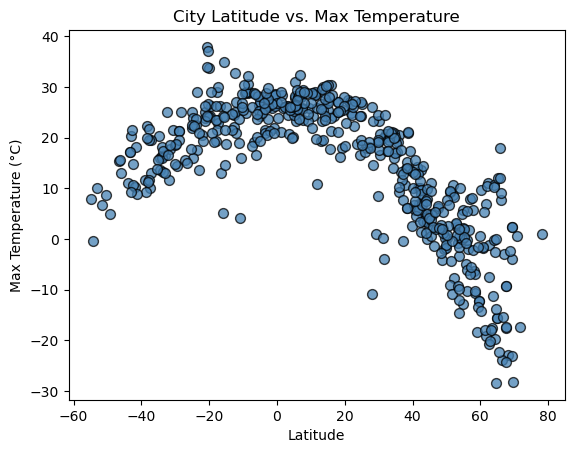

In [97]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors="black",
            s=50, alpha=0.75)

# Provided labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

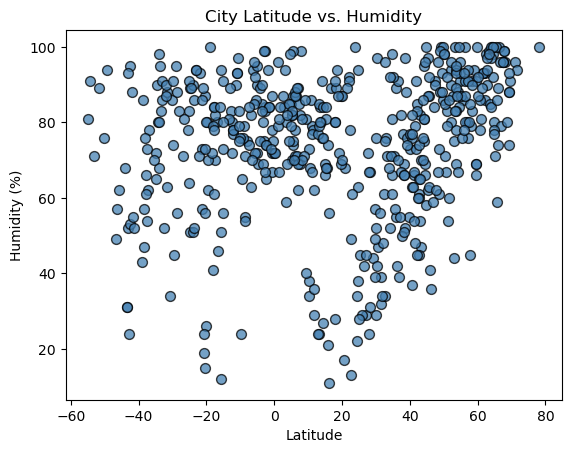

In [98]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors="black",
            s=50, alpha=0.75)

# Provided labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

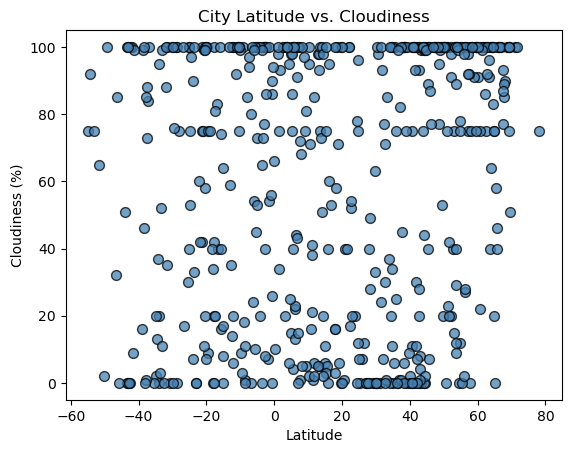

In [99]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors="black",
            s=50, alpha=0.75)

# Provided labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

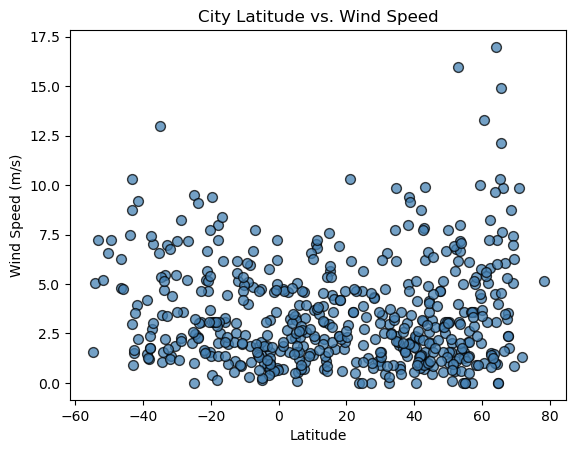

In [100]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors="black",
            s=50, alpha=0.75)

# Provided labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [101]:
# Created a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Displayed sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,-1.82,78,22,13.29,GL,1731372152
1,olonkinbyen,70.9221,-8.7187,0.56,96,100,9.83,SJ,1731372153
7,las tablas,7.7667,-80.2833,23.43,99,68,3.27,PA,1731372159
9,nova sintra,14.8667,-24.7167,27.04,69,11,7.57,CV,1731372161
10,vorgashor,67.5833,63.9500,-17.51,96,77,3.53,RU,1731372163


In [102]:
# Created a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]


# Displayed sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,-0.35,91,92,5.06,GS,1731372154
3,blackmans bay,-43.0167,147.3167,20.29,52,0,0.89,AU,1731372155
4,adamstown,-25.0660,-130.1015,21.82,64,100,1.00,PN,1731372156
5,port-aux-francais,-49.3500,70.2167,4.96,94,100,7.24,TF,1731372157
6,howard springs,-12.4970,131.0470,32.71,72,14,3.01,AU,1731372158


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7398638000209415


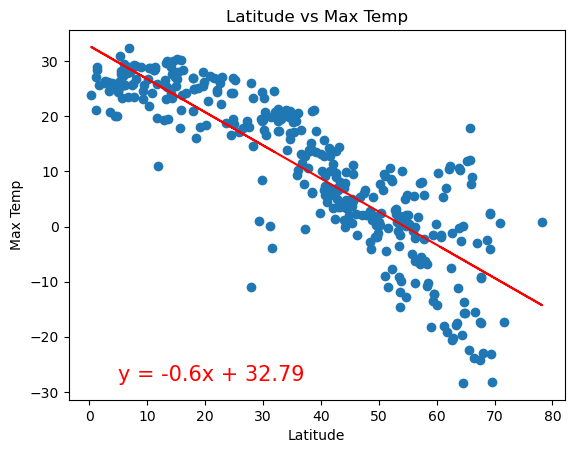

In [103]:
# Defined x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Constructed the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Build the scatter plots for Latitude vs. Max Temperature
plt.scatter(x_values,y_values)

# Provided labels 
plt.annotate(line_eq,(5,-28),fontsize=15,color="red")
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print out the r-value
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.4420898305097649


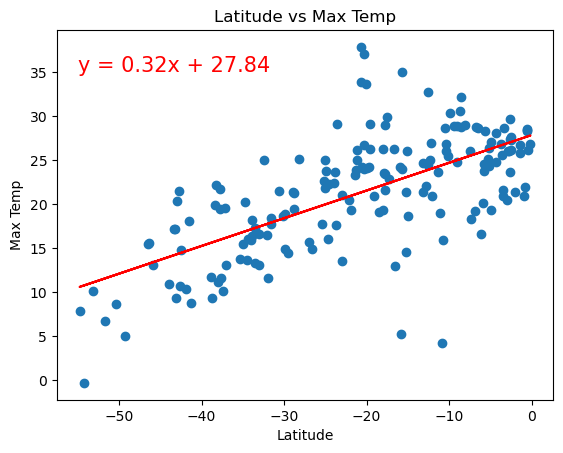

In [104]:
# Defined x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Constructed the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Build the scatter plots for Latitude vs. Max Temperature
plt.scatter(x_values,y_values)

# Provided labels 
plt.annotate(line_eq, (-55, 35), fontsize=15, color="red")
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print out the r-value
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** The northern hemisphere had a higher r-value than the southern hemisphere. Latitude and Max Temp has a stronger correlation in the northern hemisphere than the southern hemisphere with a more milder correlation. Both the northern and southern hemisphere showed a positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.09339595080661066


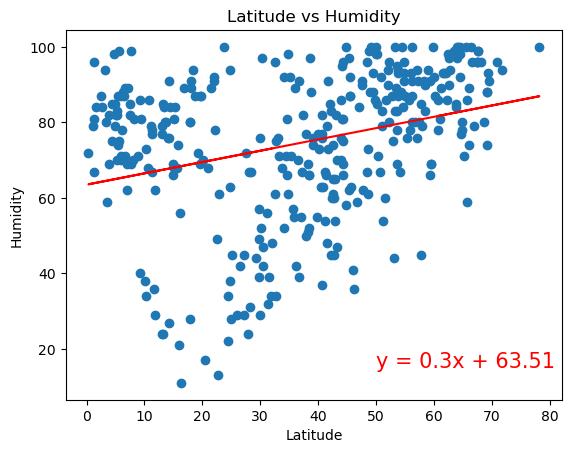

In [105]:
# Defined x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Constructed the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Build the scatter plots for Latitude vs. Humidity
plt.scatter(x_values,y_values)

# Provided labels 
plt.annotate(line_eq, (50,15), fontsize=15, color="red")
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude') 
plt.ylabel('Humidity')

# Print out the r-value
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.03405261665371611


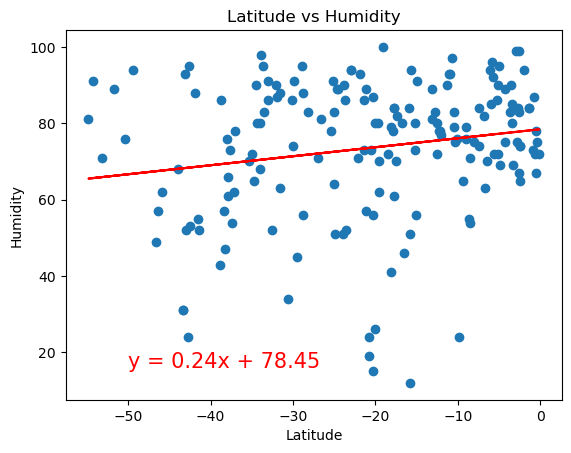

In [106]:
# Defined x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Constructed the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Build the scatter plots for Latitude vs. Humidity
plt.scatter(x_values,y_values)

# Provided labels 
plt.annotate(line_eq, (-50, 16), fontsize=15, color="red")
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude') 
plt.ylabel('Humidity')

# Print out the r-value
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** The low r-value shows a positively weak correlation between latitude and humidity for both the northern and southern hemisphers.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05944461623896347


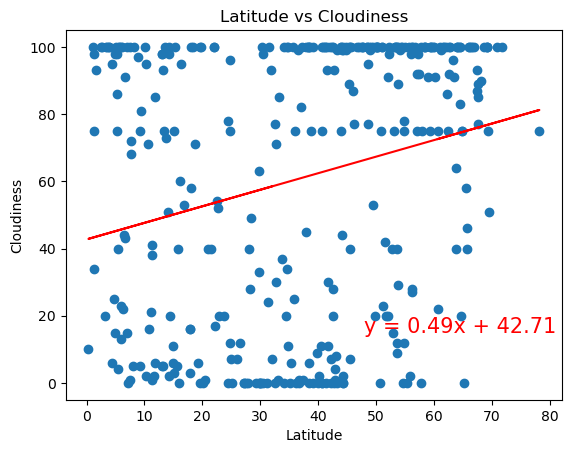

In [107]:
# Defined x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Constructed the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Build the scatter plots for Latitude vs. Cloudiness
plt.scatter(x_values,y_values)

# Provided labels 
plt.annotate(line_eq, (48, 15), fontsize=15, color="red")
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness')

# Print out the r-value
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.010257757517585838


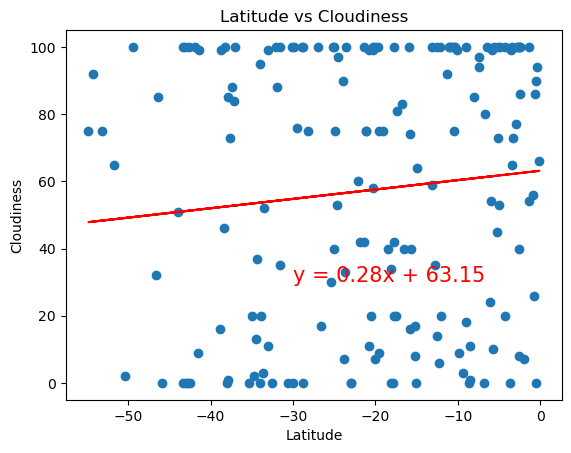

In [108]:
# Defined x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Constructed the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Build the scatter plots for Latitude vs. Cloudiness
plt.scatter(x_values,y_values)

# Provided labels 
plt.annotate(line_eq, (-30, 30), fontsize=15, color="red")
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness')

# Print out the r-value
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** The low r-value shows a positively weak correlation between latitude and cloudiness for both the northern and southern hemisphers.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03901765163661442


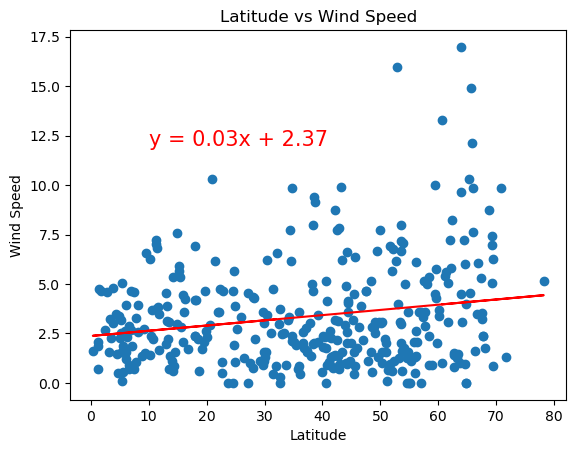

In [109]:
# Defined x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Constructed the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Build the scatter plots for Latitude vs. Wind Speed
plt.scatter(x_values,y_values)

# Provided labels 
plt.annotate(line_eq, (10, 12), fontsize=15, color="red")
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')

# Print out the r-value
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.07872287627782244


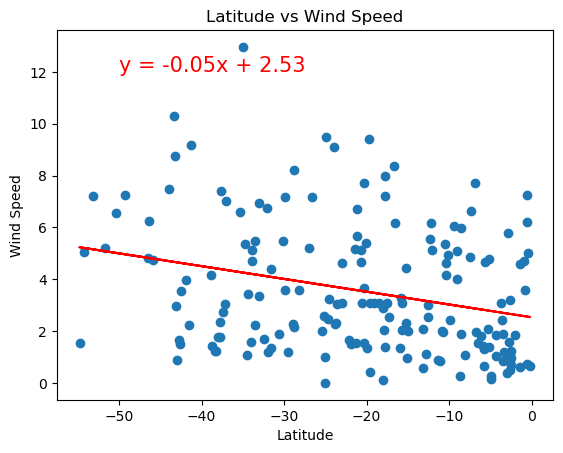

In [110]:
# Defined x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Constructed the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Build the scatter plots for Latitude vs. Wind Speed
plt.scatter(x_values,y_values)

# Provided labels 
plt.annotate(line_eq, (-50, 12), fontsize=15, color="red")
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')

# Print out the r-value
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** The low r-value shows a positively weak correlation between latitude and wind speed for both the northern and southern hemisphers.